In [64]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt

In [65]:

def load_latency_profile(path):
    model_name = None
    device_used = None
    cache_used = None

    output = {}

    for json_file in glob.glob(path):
        with open(json_file, 'r') as f:
            data = json.load(f)

        if model_name is None:
            model_name = data["model_name"]
            device_used = data["device_used"]
            cache_used = data["cache_used"]

        # ensure correctness
        assert data["model_name"] == model_name
        assert data["device_used"] == device_used
        assert data["cache_used"] == cache_used

        dataset_name = data["dataset_name"]

        results = data["results"]

        avg_latency_lb = 0
        avg_latency_ub = 0

        for result in results:
            cache_time = float(result["cache_time"])
            response_time = float(result["response_time"])

            avg_latency_lb += response_time
            avg_latency_ub += response_time + cache_time

        avg_latency_lb /= len(results)
        avg_latency_ub /= len(results)

        output[dataset_name] = {
            "latency_lb": avg_latency_lb,
            "latency_ub": avg_latency_ub
        }

    return output


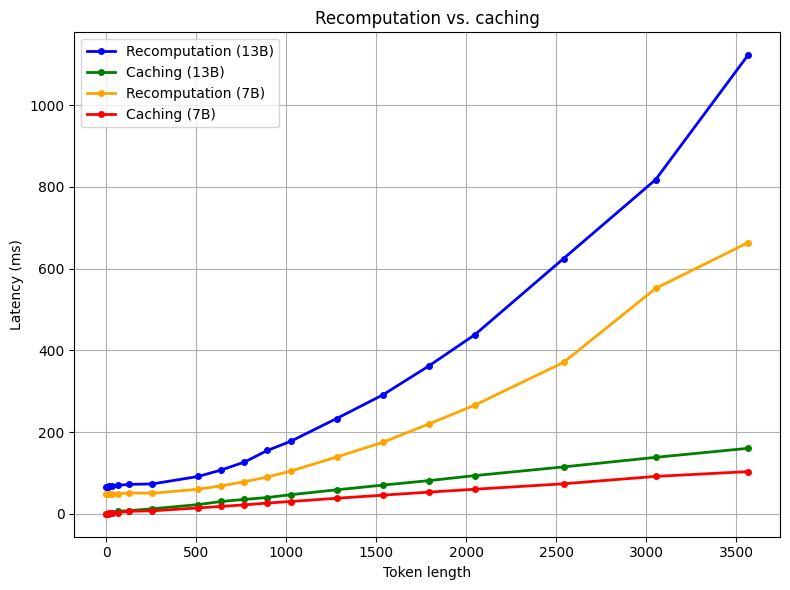

In [66]:




def plot_latency_gpu(model_name: str):
    # get all files
    path_gpu_no_cache = f"./benchmark/results_latency/{model_name}-gpu-no_cache-*.json"
    path_gpu_cache = f"./benchmark/results_latency/{model_name}-gpu-cache-*.json"

    result_gpu_no_cache = load_latency_profile(path_gpu_no_cache)
    result_gpu_cache = load_latency_profile(path_gpu_cache)

    dataset_names = result_gpu_no_cache.keys()

    # gather the 
    latency_lb_gpu_no_cache = [result_gpu_no_cache[dataset_name]["latency_lb"] for dataset_name in dataset_names]
    latency_ub_gpu_cache = [result_gpu_cache[dataset_name]["latency_ub"] for dataset_name in dataset_names]
    latency_lb_gpu_cache = [result_gpu_cache[dataset_name]["latency_lb"] for dataset_name in dataset_names]

    # Sample data
    n = len(dataset_names)  # Number of groups
    labels = dataset_names
    values_1 = latency_lb_gpu_no_cache  #np.random.randint(1, 10, n)  # Sample data for grey bars
    values_2 = latency_ub_gpu_cache  #np.random.randint(1, 10, n)  # Sample data for blue bars
    values_3 = latency_lb_gpu_cache  #np.random.randint(1, 10, n)  # Sample data for orange bars

    # Bar width, space within group, and space between groups
    bar_width = 0.2
    space = 0.05  # Space between bars within the same group
    group_space = 0.3  # Space between different groups of bars

    # Compute the adjusted positions
    index = np.arange(n) * (3 * bar_width + 2 * space + group_space)
    plt.figure(figsize=(15, 4))
    # Plotting the bars
    plt.bar(index, values_1, bar_width, color='grey', label='Baseline')
    plt.bar(index + bar_width + space, values_2, bar_width, color='blue', label='Prompt Caching (full reload)')
    plt.bar(index + 2 * bar_width + 2 * space, values_3, bar_width, color='orange', label='Prompt Caching (prefetched)')

    # Adding the labels, title, and legend
    plt.xlabel('Dataset')
    plt.ylabel('latency (ms)')
    plt.title('Latency of GPU inference')
    plt.xticks(index + bar_width + space, labels)  # Adjust the tick positions
    plt.legend()

    # Displaying the plot
    plt.tight_layout()
    plt.show()


def plot_latency_cpu(model_name: str):
    # get all files
    path_gpu_no_cache = f"./benchmark/results_latency/{model_name}-cpu-no_cache-*.json"
    path_gpu_cache = f"./benchmark/results_latency/{model_name}-cpu-cache-*.json"

    result_gpu_no_cache = load_latency_profile(path_gpu_no_cache)
    result_gpu_cache = load_latency_profile(path_gpu_cache)

    dataset_names = result_gpu_no_cache.keys()

    # gather the 
    latency_lb_gpu_no_cache = [result_gpu_no_cache[dataset_name]["latency_lb"] for dataset_name in dataset_names]
    latency_ub_gpu_cache = [result_gpu_cache[dataset_name]["latency_ub"] for dataset_name in dataset_names]
    latency_lb_gpu_cache = [result_gpu_cache[dataset_name]["latency_lb"] for dataset_name in dataset_names]

    # Sample data
    n = len(dataset_names)  # Number of groups
    labels = dataset_names
    values_1 = latency_lb_gpu_no_cache  #np.random.randint(1, 10, n)  # Sample data for grey bars
    values_2 = latency_ub_gpu_cache  #np.random.randint(1, 10, n)  # Sample data for blue bars
    values_3 = latency_lb_gpu_cache  #np.random.randint(1, 10, n)  # Sample data for orange bars

    # Bar width, space within group, and space between groups
    bar_width = 0.2
    space = 0.05  # Space between bars within the same group
    group_space = 0.3  # Space between different groups of bars

    # Compute the adjusted positions
    index = np.arange(n) * (3 * bar_width + 2 * space + group_space)
    plt.figure(figsize=(15, 4))
    # Plotting the bars
    plt.bar(index, values_1, bar_width, color='grey', label='Baseline')
    plt.bar(index + bar_width + space, values_2, bar_width, color='blue', label='Prompt Caching (full reload)')
    plt.bar(index + 2 * bar_width + 2 * space, values_3, bar_width, color='orange', label='Prompt Caching (prefetched)')

    # Adding the labels, title, and legend
    plt.xlabel('Dataset')
    plt.ylabel('latency (ms)')
    plt.title('Latency of CPU inference')
    plt.xticks(index + bar_width + space, labels)  # Adjust the tick positions
    plt.legend()

    # Displaying the plot
    plt.tight_layout()
    plt.show()


def plot_critical_point(model_name: str):
    path_recomputation_13b = f"./benchmark/results_latency/{model_name}-critical_point-recomputation-13b.json"
    path_upload_13b = f"./benchmark/results_latency/{model_name}-critical_point-upload-13b.json"
    path_recomputation_7b = f"./benchmark/results_latency/{model_name}-critical_point-recomputation-7b.json"
    path_upload_7b = f"./benchmark/results_latency/{model_name}-critical_point-upload-7b.json"

    data_recomputation_13b = json.load(open(path_recomputation_13b, 'r'))['results'][1:]
    data_upload_13b = json.load(open(path_upload_13b, 'r'))['results'][1:]
    data_recomputation_7b = json.load(open(path_recomputation_7b, 'r'))['results'][1:]
    data_upload_7b = json.load(open(path_upload_7b, 'r'))['results'][1:]

    xx = [int(x['seq_len']) for x in data_recomputation_13b]
    time_re_13b = [float(x['time']) for x in data_recomputation_13b]
    time_up_13b = [float(x['time']) for x in data_upload_13b]

    time_re_7b = [float(x['time']) for x in data_recomputation_7b]
    time_up_7b = [float(x['time']) for x in data_upload_7b]

    # Sample data
    x = xx  # np.linspace(0, 10, 100)  # 100 evenly spaced points between 0 and 10

    # Create the figure and axes
    plt.figure(figsize=(8, 6))

    # Plotting the lines
    plt.plot(x, time_re_13b, '-o', label='Recomputation (13B)', color='blue', linewidth=2, markersize=4)
    plt.plot(x, time_up_13b, '-o', label='Caching (13B)', color='green', linewidth=2, markersize=4)
    plt.plot(x, time_re_7b, '-o', label='Recomputation (7B)', color='orange', linewidth=2, markersize=4)
    plt.plot(x, time_up_7b, '-o', label='Caching (7B)', color='red', linewidth=2, markersize=4)

    # Adding titles, labels, and legend
    plt.title('Recomputation vs. caching')
    plt.xlabel('Token length')
    plt.ylabel('Latency (ms)')
    plt.legend()

    # Displaying the plot
    plt.grid(True)  # Optional: Adds a grid for better readability
    plt.tight_layout()
    plt.show()


def memory_pressure():
    
    
    pass


# plot_latency_gpu("llama")
# plot_latency_cpu("llama")
plot_critical_point("llama")